In [24]:
import sys
import os
import pandas as pd
import numpy as np
import cv2 as cv
import numpy as np
import roifile
import matplotlib.pyplot as plt
from skimage import io
import matplotlib.pyplot as plt

In [ ]:
data_dir = "/nadeem_lab/Gunjan/data/impartial/Vectra1CH_images/nuclear_mask/"
img_name1 = 'Hodgkin_Dapi9.png'
img_name2 = 'Hodgkin_Dapi9.tif'
img_mask1 = np.array(io.imread(data_dir + img_name1)).astype(int)
img_mask2 = np.array(io.imread(data_dir + img_name2)).astype(int)
# io.imsave(data_dir + "Hodgkin_Dapi8.png", img_mask)

print("img_mask", img_mask1.shape)
print("img_mask", img_mask2.shape)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(img_mask1)

plt.subplot(1,2,2)
plt.title("Image")
plt.imshow(img_mask2)



In [28]:
def percentile_normalization(image, pmin=1, pmax=98, clip = False):
    # Normalize the image using percentiles
    lo, hi = np.percentile(image, (pmin, pmax))
    image_norm_percentile = (image - lo) / (hi - lo)
    
    if clip:
        image_norm_percentile[image_norm_percentile>1] = 1
        image_norm_percentile[image_norm_percentile<0] = 0
        
    return image_norm_percentile

In [ ]:
from os.path import join
import glob
from scipy import ndimage

data_dir = "/nadeem_lab/Gunjan/data/impartial/Vectra1CH_images/nuclear_mask/"

filenames  = sorted(glob.glob(join(data_dir,'*Class3.png')))
images = sorted(glob.glob(join(data_dir,'*Nuclear.png')))

# print("filenames \n", filenames)

# print("images \n", images)
count = 0
savedir = "/nadeem_lab/Gunjan/data/impartial/Vectra1CH/"

for (image, filename) in zip(images, filenames):
    print(image)
    # print(filename)

    img = np.array(io.imread(image)).astype(int)

    # Normalize input image
    ch_number = np.mean(img)
    # print("ch_number : ", ch_number)

    img = percentile_normalization(img, pmin=1, pmax=98, clip = False)

    ch_number = np.mean(img)
    # print("ch_number : ", ch_number)

    img_mask = np.array(io.imread(filename)).astype(int)

    # print("img_mask", img_mask.shape)

    pred_thresholded = img_mask / 255
    labels, _ = ndimage.label(pred_thresholded)

    # np.savez('/nadeem_lab/Gunjan/data/impartial/Vectra1CH/' + 'image_' + str(count) + '.npz', image = img, label = labels)

    # plt.figure(figsize=(20,20))
    # plt.subplot(1,3,1)
    # plt.title("Image")
    # plt.imshow(img)

    # plt.subplot(1,3,2)
    # plt.title("Image mask")
    # plt.imshow(img_mask)

    # plt.subplot(1,3,3)
    # plt.title("labels_pred")
    # plt.imshow(labels)

    # break

    count = count +1




In [43]:
row_list = []
# prefix     input_file  group
for i in range(0,35):
    group = 'train'
    row_list.append(['image_' + str(i), 'image_' + str(i) + '.npz', group])

In [44]:
savedir = "/nadeem_lab/Gunjan/data/impartial/Vectra1CH/"

pd_files = pd.DataFrame(data = row_list, columns = ['prefix', 'input_file','group'])
pd_files.to_csv(savedir + 'files.csv')

In [45]:
pd_file = pd.read_csv(savedir + 'files.csv')
print(savedir + 'files.csv')
pd_file

/nadeem_lab/Gunjan/data/impartial/Vectra1CH/files.csv


,Unnamed: 0,prefix,input_file,group
0,0,image_0,image_0.npz,train
1,1,image_1,image_1.npz,train
2,2,image_2,image_2.npz,train
3,3,image_3,image_3.npz,train
4,4,image_4,image_4.npz,train
5,5,image_5,image_5.npz,train
6,6,image_6,image_6.npz,train
7,7,image_7,image_7.npz,train
8,8,image_8,image_8.npz,train
9,9,image_9,image_9.npz,train


img_mask [[  0   0   0 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


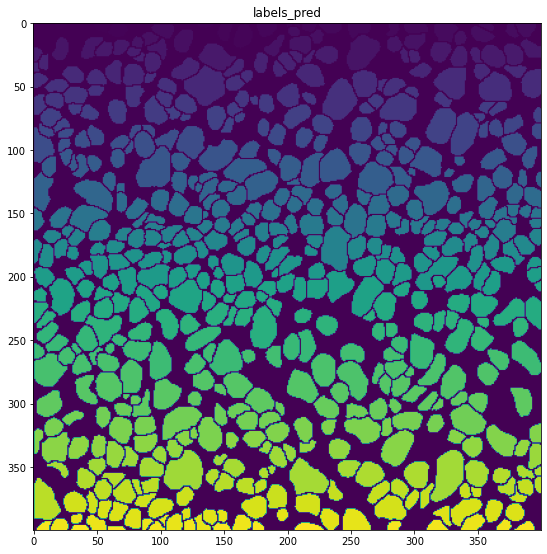

In [15]:
from scipy import ndimage

print("img_mask", img_mask)
pred_thresholded = img_mask / 255


# pred_thresholded1 = img_mask[:,:,0] / 255
# pred_thresholded2 = img_mask[:,:,1] / 255
# pred_thresholded3 = img_mask[:,:,2] / 255
# pred_thresholded4 = img_mask[:,:,3] / 255

# labels_pred1, _ = ndimage.label(pred_thresholded1)
# labels_pred2, _ = ndimage.label(pred_thresholded2)
# labels_pred3, _ = ndimage.label(pred_thresholded3)
# labels_pred4, _ = ndimage.label(pred_thresholded4)
labels_pred, _ = ndimage.label(pred_thresholded)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("labels_pred")
plt.imshow(labels_pred)

# plt.subplot(1,4,2)
# plt.title("labels_pred")
# plt.imshow(labels_pred2)

# plt.subplot(1,4,3)
# plt.title("labels_pred")
# plt.imshow(labels_pred3)

# plt.subplot(1,4,4)
# plt.title("labels_pred")
# plt.imshow(labels_pred4)